In [33]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from typing import *
from IPython.display import display, Markdown

import seaborn as sns
%matplotlib inline
sns.set_theme()

# Data Dictionary
- Connor Escajeda & Jonathon Qualls

## What is our data?
Our data is about the oxide content within volcanic crystals found in the Matan volcanic center, northern Harrat Rahat, Saudi Arabia. Measurements are found using an electron microscope and the orginators of this study are Mark E. Stelten and Drew T. Downs.

| Column       | Description |
| -----------  | ----------- |
| Sample Name     | Sample collection number      |
| Analysis Name | Unique identifier for electron microprobe analysis     |
| Mineral Phase        | Type of mineral analyzed |
| Context             | The description and classification of the rock analysis |
| SiO2 | Weight percent concentration of silicon measured by electron microprobe reported as silicon oxide |
| TiO2 |  Weight percent concentration of titanium measured by electron microprobe reported as titanium oxide|
| Al2O3 |  Weight percent concentration of aluminum by electron microprobe reported as aluminum oxide |
| FeO* | Weight percent concentration of iron measured by electron microprobe reported as ferrous iron oxide. The asterisk indicates that in this measurement all the iron is calculated as ferrous iron. |
| FeO | Weight percent concentration of ferrous iron oxide recalculated from total iron measured by electron microprobe (FeO*) to maintain charge balance in spinel series minerals on a three cation - four oxygen basis, or in pyroxenes on a two cation - three oxygen basis. |
|Fe2O3| Weight percent concentration of ferric iron oxide recalculated from total iron measured by electron microprobe (FeO*) to maintain charge balance in spinel series minerals on a three cation - four oxygen basis, or in pyroxenes on a two cation - three oxygen basis. |
| CaO| Weight percent concentration of calcium measured by electron microprobe reported as calcium oxide |
| Na2O | Weight percent concentration of sodium measured by electron microprobe reported as sodium oxide |
|K2O | Weight percent concentration of potassium measured by electron microprobe reported as potassium oxide |
| MnO | Weight percent concentration of manganese measured by electron microprobe reported as manganese oxide |
| MgO | Weight percent concentration of magnesium measured by electron microprobe reported as magnesium oxide |
|NiO | Weight percent concentration of nickel measured by electron microprobe reported as nickel oxide|
| Cr2O3 | Weight percent concentration of chromium measured by electron microprobe reported as chromium oxide |
|V2O3 | Weight percent concentration of vanadium measured by electron microprobe reported as vanadium oxide |
 |Total | Sum of oxide weight concentrations|

In [34]:
df = pd.read_csv("MVC_EMPAdata.csv")

In [35]:
def show_markdown_table(headers: List[str], data: List) -> str:
    s = f"| {' | '.join(headers)} |\n| {' | '.join([(max(1, len(header) - 1)) * '-' + ':' for header in headers])} |\n"
    for row in data:
        s += f"| {' | '.join([str(item) for item in row])} |\n"
    display(Markdown(s))

## Cleaning up the table

In [36]:
df = df.drop(["Unit Abbreviation", "XAb","XAn", "XOr", "XFa", "XFo", "XTp", "XWo", "XEn", "XFs", "XJd", "XAe", "XQuad"], axis = 1)

In [37]:
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

In [38]:
df = df.drop_duplicates()
df = df.drop([1612])

In [39]:
col = [column.strip() for column in df.columns]
df.columns = col
df = df.replace("BDL", np.nan)

In [40]:
df = df.astype({"SiO2": float, "TiO2": float, "Al2O3": float, "FeO*": float, "FeO": float, "Fe2O3": float,"CaO": float, "NiO": float, "V2O3": float,"Cr2O3": float, "MnO": float, "Cr2O3": float, "MgO": float})

In [41]:
df.head(2)

Sample Name      Analysis Name Mineral phase     Context  SiO2  TiO2  Al2O3  \
0    R14DC044  R14DC044-GM-PLAG1   Plagioclase  Groundmass  53.3   NaN   28.6   
1    R14DC044  R14DC044-GM-PLAG2   Plagioclase  Groundmass  54.2   NaN   28.2   

   FeO*  FeO  Fe2O3   CaO  Na2O  K2O  MnO  MgO  NiO  Cr2O3  V2O3  Total  
0  0.66  NaN    NaN  11.7   4.4  0.3  NaN  NaN  NaN    NaN   NaN   99.0  
1  0.81  NaN    NaN  11.1   4.7  0.3  NaN  NaN  NaN    NaN   NaN   99.3

## Unique Samples

In [42]:
tmp = df["Sample Name"].unique()
print(f"Unique Samples : {len(tmp)}")

Unique Samples : 23


# Stats!

In [43]:
df.dtypes

Sample Name       object
Analysis Name     object
Mineral phase     object
Context           object
SiO2             float64
TiO2             float64
Al2O3            float64
FeO*             float64
FeO              float64
Fe2O3            float64
CaO              float64
Na2O             float64
K2O              float64
MnO              float64
MgO              float64
NiO              float64
Cr2O3            float64
V2O3             float64
Total            float64
dtype: object

In [44]:
describe_df = df.describe()

In [45]:
df.describe()

SiO2        TiO2        Al2O3         FeO*         FeO  \
count  1602.000000  335.000000  1212.000000  1168.000000  330.000000   
mean     48.627903    9.232836    17.747030    10.073870   26.000606   
std      17.435379   10.998206    10.410239    15.693972   18.403381   
min       0.100000    0.100000     0.100000     0.120000    0.300000   
25%      38.700000    0.800000     4.800000     0.310000    8.800000   
50%      52.400000    3.000000    19.100000     0.460000   19.750000   
75%      64.000000   22.000000    26.800000    16.500000   48.175000   
max      68.700000   31.000000    35.700000    63.200000   55.200000   

            Fe2O3          CaO         Na2O         K2O         MnO  \
count  333.000000  1356.000000  1086.000000  877.000000  734.000000   
mean    14.136637     6.351622     5.706906    3.069783    0.779973   
std     14.218107     6.913224     2.590681    3.138174    0.734880   
min      0.400000     0.100000     0.400000    0.100000    0.100000   
25%      3.000000     0.300000     4.500000    0.300000    0.300000   
50%      8.900000     2.500000     6.000000    0.900000    0.600000   
75%     21.600000    11.525000     7.400000    5.800000    1.100000   
max     65.100000    22.100000    13.800000   10.000000    4.400000   

              MgO         NiO      Cr2O3        V2O3        Total  
count  695.000000  256.000000  78.000000  104.000000  1612.000000  
mean    20.912374    0.192188   1.280769    0.557692    99.490509  
std     16.511497    0.097907   3.540785    0.281705     1.187302  
min      0.100000    0.100000   0.100000    0.100000    94.100000  
25%      3.500000    0.100000   0.100000    0.400000    98.900000  
50%     21.000000    0.200000   0.200000    0.600000    99.600000  
75%     37.300000    0.300000   0.800000    0.800000   100.200000  
max     47.300000    0.400000  24.900000    1.200000   103.400000

In [46]:
rslt_df = describe_df.sort_values(by = 'mean', axis = 1, ascending=False)

In [47]:
mean_list = rslt_df.iloc[1].tolist()
cols = rslt_df.columns.tolist()

In [48]:
tmp = {}
for count, value in enumerate(mean_list):
    tmp[cols[count]] = value
del tmp["Total"]

# Average amount of each oxide concentration in all samples

In [49]:
show_markdown_table(["Chemical", "Average amount in samples"], [[col, tmp[col]] for col in tmp])

| Chemical | Average amount in samples |
| -------: | ------------------------: |
| SiO2 | 48.627902621723116 |
| FeO | 26.000606060606067 |
| MgO | 20.91237410071943 |
| Al2O3 | 17.747029702970302 |
| Fe2O3 | 14.136636636636629 |
| FeO* | 10.073869863013702 |
| TiO2 | 9.232835820895527 |
| CaO | 6.351622418879059 |
| Na2O | 5.706906077348066 |
| K2O | 3.0697833523375144 |
| Cr2O3 | 1.28076923076923 |
| MnO | 0.779972752043596 |
| V2O3 | 0.5576923076923076 |
| NiO | 0.19218750000000034 |


In [50]:
df.head(1)

Sample Name      Analysis Name Mineral phase     Context  SiO2  TiO2  Al2O3  \
0    R14DC044  R14DC044-GM-PLAG1   Plagioclase  Groundmass  53.3   NaN   28.6   

   FeO*  FeO  Fe2O3   CaO  Na2O  K2O  MnO  MgO  NiO  Cr2O3  V2O3  Total  
0  0.66  NaN    NaN  11.7   4.4  0.3  NaN  NaN  NaN    NaN   NaN   99.0

# Concentrations Based on Context & Mineral Phase

In [51]:
mpgroups = df.groupby('Mineral phase')
mpgroups.describe()

SiO2                                                     \
               count       mean       std   min   25%   50%   75%   max   
Mineral phase                                                             
Olivine        399.0  36.792231  2.536481  29.0  34.9  37.5  38.8  41.4   
Plagioclase    877.0  60.407526  5.938758  48.8  54.3  60.5  66.3  68.7   
Pyroxene       209.0  48.915311  2.199728  42.7  47.2  49.3  50.4  53.1   
Spinel         117.0   0.180342  0.267569   0.1   0.1   0.1   0.1   1.8   

                TiO2                                                     \
               count       mean       std  min    25%   50%   75%   max   
Mineral phase                                                             
Olivine          0.0        NaN       NaN  NaN    NaN   NaN   NaN   NaN   
Plagioclase      0.0        NaN       NaN  NaN    NaN   NaN   NaN   NaN   
Pyroxene       208.0   1.673077  1.506138  0.1   0.50   1.0   2.9   5.8   
Spinel         127.0  21.614173  8.249711  0.3  19.65  24.1  27.7  31.0   

               Al2O3                                                     \
               count       mean       std   min   25%   50%   75%   max   
Mineral phase                                                             
Olivine          0.0        NaN       NaN   NaN   NaN   NaN   NaN   NaN   
Plagioclase    877.0  23.667047  4.526015  16.7  18.9  24.1  28.0  32.2   
Pyroxene       209.0   2.410048  1.823206   0.3   0.9   1.6   4.0   7.1   
Spinel         126.0   1.981746  3.334244   0.1   1.0   1.3   2.1  35.7   

                FeO*                                                           \
               count       mean        std    min    25%    50%    75%    max   
Mineral phase                                                                   
Olivine        399.0  28.681955  13.943384  11.40  16.05  26.30  39.65  63.20   
Plagioclase    769.0   0.418960   0.525967   0.12   0.26   0.35   0.45   8.68   
Pyroxene         0.0        NaN        NaN    NaN    NaN    NaN    NaN    NaN   
Spinel           0.0        NaN        NaN    NaN    NaN    NaN    NaN    NaN   

                 FeO                                                       \
               count       mean       std   min    25%   50%    75%   max   
Mineral phase                                                               
Olivine          0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN   
Plagioclase      0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN   
Pyroxene       203.0  12.489655  6.457128   0.3   7.55  11.2  19.00  24.4   
Spinel         127.0  47.596850  7.300565  20.2  46.45  49.8  52.65  55.2   

               Fe2O3                                                         \
               count       mean        std  min     25%    50%    75%   max   
Mineral phase                                                                 
Olivine          0.0        NaN        NaN  NaN     NaN    NaN    NaN   NaN   
Plagioclase      0.0        NaN        NaN  NaN     NaN    NaN    NaN   NaN   
Pyroxene       206.0   7.872330   9.663613  0.4   2.525   3.25   7.75  34.7   
Spinel         127.0  24.297638  14.577464  6.4  14.950  19.40  25.85  65.1   

                 CaO                                                     Na2O  \
               count       mean       std  min   25%   50%   75%   max  count   
Mineral phase                                                                   
Olivine        399.0   0.384962  0.351557  0.2   0.3   0.3   0.4   5.1    0.0   
Plagioclase    748.0   6.591043  5.015159  0.1   0.5   7.9  11.3  15.8  877.0   
Pyroxene       209.0  16.885646  6.385815  0.9  16.6  19.9  21.0  22.1  209.0   
Spinel           0.0        NaN       NaN  NaN   NaN   NaN   NaN   NaN    0.0   

                                                               K2O            \
                   mean       std  min  25%  50%  75%   max  count      mean   
Mineral phase                                   

In [52]:
cgroups = df.groupby('Context')
cgroups.describe()

SiO2                                      \
                                count       mean        std   min     25%   
Context                                                                     
Groundmass                      706.0  41.605524  20.648920   0.1  37.225   
Groundmass 1 Core                 1.0  37.700000        NaN  37.7  37.700   
Groundmass 1 Rim                  1.0  35.800000        NaN  35.8  35.800   
Groundmass 2 Core                 1.0  37.200000        NaN  37.2  37.200   
Groundmass 2 Rim                  1.0  36.600000        NaN  36.6  36.600   
...                               ...        ...        ...   ...     ...   
Phenocryst Rim to Core Line 63    1.0  67.800000        NaN  67.8  67.800   
Phenocryst Rim to Core Line 64    1.0  67.600000        NaN  67.6  67.600   
Phenocryst Rim to Core Line 7     2.0  66.900000   0.707107  66.4  66.650   
Phenocryst Rim to Core Line 8     2.0  67.150000   0.777817  66.6  66.875   
Phenocryst Rim to Core Line 9     2.0  66.850000   0.919239  66.2  66.525   

                                                      TiO2            \
                                  50%     75%   max  count      mean   
Context                                                                
Groundmass                      48.50  53.100  68.7  320.0  9.627813   
Groundmass 1 Core               37.70  37.700  37.7    0.0       NaN   
Groundmass 1 Rim                35.80  35.800  35.8    0.0       NaN   
Groundmass 2 Core               37.20  37.200  37.2    0.0       NaN   
Groundmass 2 Rim                36.60  36.600  36.6    0.0       NaN   
...                               ...     ...   ...    ...       ...   
Phenocryst Rim to Core Line 63  67.80  67.800  67.8    0.0       NaN   
Phenocryst Rim to Core Line 64  67.60  67.600  67.6    0.0       NaN   
Phenocryst Rim to Core Line 7   66.90  67.150  67.4    0.0       NaN   
Phenocryst Rim to Core Line 8   67.15  67.425  67.7    0.0       NaN   
Phenocryst Rim to Core Line 9   66.85  67.175  67.5    0.0       NaN   

                                                                       Al2O3  \
                                      std  min  25%  50%    75%   max  count   
Context                                                                        
Groundmass                      11.096909  0.1  0.8  3.3  22.25  31.0  564.0   
Groundmass 1 Core                     NaN  NaN  NaN  NaN    NaN   NaN    0.0   
Groundmass 1 Rim                      NaN  NaN  NaN  NaN    NaN   NaN    0.0   
Groundmass 2 Core                     NaN  NaN  NaN  NaN    NaN   NaN    0.0   
Groundmass 2 Rim                      NaN  NaN  NaN  NaN    NaN   NaN    0.0   
...                                   ...  ...  ...  ...    ...   ...    ...   
Phenocryst Rim to Core Line 63        NaN  NaN  NaN  NaN    NaN   NaN    1.0   
Phenocryst Rim to Core Line 64        NaN  NaN  NaN  NaN    NaN   NaN    1.0   
Phenocryst Rim to Core Line 7         NaN  NaN  NaN  NaN    NaN   NaN    2.0   
Phenocryst Rim to Core Line 8         NaN  NaN  NaN  NaN    NaN   NaN    2.0   
Phenocryst Rim to Core Line 9         NaN  NaN  NaN  NaN    NaN   NaN    2.0   

                                                                              \
                                     mean        std   min   25%   50%   75%   
Context                                                                        
Groundmass                      12.061525  11.714021   0.1   1.4   4.6  23.7   
Groundmass 1 Core                     NaN        NaN   NaN   NaN   NaN   NaN   
Groundmass 1 Rim                      NaN        NaN   NaN   NaN   NaN   NaN   
Groundmass 2 Core                     NaN        NaN   NaN   NaN   NaN   NaN   
Groundmass 2 Rim                      NaN        NaN   NaN   NaN   NaN   NaN   
...                                   ...        ...   ...   ...   ...   ...   
Phenocryst Rim to Core Line 63  18.800000        NaN  18.8  18.8  18.8  18.8   
Phenocryst Rim to Core L

Notice that we have two groups in Context, but with different Strings appended to it. We can edit this to be just the starting string. This will allow us to do better groupings.

In [53]:
df.count()

Sample Name      1612
Analysis Name    1612
Mineral phase    1612
Context          1612
SiO2             1602
TiO2              335
Al2O3            1212
FeO*             1168
FeO               330
Fe2O3             333
CaO              1356
Na2O             1086
K2O               877
MnO               734
MgO               695
NiO               256
Cr2O3              78
V2O3              104
Total            1612
dtype: int64

In [54]:
def clean_context(x):
    if 'Groundmass' in x:
        return 'Groundmass'
    if 'Phenocryst' in x:
        return 'Phenocryst'
ndf = df
ndf['Context'] = ndf['Context'].apply(clean_context)

### New data of context after cleaning it up

In [55]:
cgroups2 = ndf.groupby('Context')
cgroups2.describe()

SiO2                                                       TiO2  \
            count       mean        std   min   25%   50%   75%   max  count   
Context                                                                        
Groundmass  737.0  41.699322  20.264428   0.1  37.2  48.5  52.9  68.7  335.0   
Phenocryst  865.0  54.531214  11.732519  31.7  39.9  56.8  65.9  68.3    0.0   

                                                            Al2O3             \
                mean        std  min  25%  50%   75%   max  count       mean   
Context                                                                        
Groundmass  9.232836  10.998206  0.1  0.8  3.0  22.0  31.0  579.0  11.772021   
Phenocryst       NaN        NaN  NaN  NaN  NaN   NaN   NaN  633.0  23.212322   

                                                      FeO*             \
                  std   min   25%   50%   75%   max  count       mean   
Context                                                                 
Groundmass  11.696856   0.1   1.3   4.4  23.3  35.7  335.0  16.489821   
Phenocryst   4.461832  16.7  18.8  21.6  27.6  30.7  833.0   7.493625   

                                                        FeO             \
                  std   min   25%   50%    75%   max  count       mean   
Context                                                                  
Groundmass  18.838295  0.15  0.58  4.40  27.25  63.2  330.0  26.000606   
Phenocryst  13.407746  0.12  0.28  0.38  11.90  47.8    0.0        NaN   

                                                      Fe2O3             \
                  std  min  25%    50%     75%   max  count       mean   
Context                                                                  
Groundmass  18.403381  0.3  8.8  19.75  48.175  55.2  333.0  14.136637   
Phenocryst        NaN  NaN  NaN    NaN     NaN   NaN    0.0        NaN   

                                                    CaO                      \
                  std  min  25%  50%   75%   max  count      mean       std   
Context                                                                       
Groundmass  14.218107  0.4  3.0  8.9  21.6  65.1  610.0  8.687377  8.175711   
Phenocryst        NaN  NaN  NaN  NaN   NaN   NaN  746.0  4.441689  4.915778   

                                          Na2O                                \
            min  25%  50%     75%   max  count      mean       std  min  25%   
Context                                                                        
Groundmass  0.1  0.4  6.8  17.150  22.1  453.0  4.766004  3.475253  0.4  0.9   
Phenocryst  0.1  0.3  0.5   9.475  13.6  633.0  6.380253  1.340168  3.7  5.3   

                              K2O                                          \
            50%  75%   max  count      mean       std  min  25%  50%  75%   
Context                                                                     
Groundmass  4.3  7.5  13.8  244.0  2.145492  2.528313  0.1  0.2  0.5  4.2   
Phenocryst  6.3  7.3  10.3  633.0  3.426066  3.276503  0.2  0.4  2.9  6.4   

                    MnO                                                 MgO  \
             max  count      mean       std  min  25%  50%  75%  max  count   
Context                                                                       
Groundmass   8.8  502.0  0.833865  0.813931  0.1  0.3  0.6  0.9  4.4  463.0   
Phenocryst  10.0  232.0  0.663362  0.506830  0.1  0.2  0.3  1.2  2.0  232.0   

                                                                      NiO  \
                 mean        std   min     25%    50%    75%   max  count   
Context                                                                     
Groundmass  13.982505  14.380477   0.1   2.400   8.00  30.75  44.9  115.0   
Phenocryst  34.742241  10.822445  16.8  23.275  39.55  45.50  47.3  141.0   

                                                        Cr2O3            \
                mean       std  min  25%  50%  75%  max count  

# Breakdown of Context and Mineral Phase
### Below is the count of each mineral phase in each context as well as the counts of the oxide compounds.

In [56]:
groups = ndf.groupby(['Context', 'Mineral phase'])
groups.count()

Sample Name  Analysis Name  SiO2  TiO2  Al2O3  FeO*  \
Context    Mineral phase                                                        
Groundmass Olivine                167            167   167     0      0   167   
           Plagioclase            244            244   244     0    244   168   
           Pyroxene               209            209   209   208    209     0   
           Spinel                 127            127   117   127    126     0   
Phenocryst Olivine                232            232   232     0      0   232   
           Plagioclase            633            633   633     0    633   601   

                          FeO  Fe2O3  CaO  Na2O  K2O  MnO  MgO  NiO  Cr2O3  \
Context    Mineral phase                                                     
Groundmass Olivine          0      0  167     0    0  167  167  115      0   
           Plagioclase      0      0  234   244  244    0    0    0      0   
           Pyroxene       203    206  209   209    0  209  179    0      0   
           Spinel         127    127    0     0    0  126  117    0     78   
Phenocryst Olivine          0      0  232     0    0  232  232  141      0   
           Plagioclase      0      0  514   633  633    0    0    0      0   

                          V2O3  Total  
Context    Mineral phase               
Groundmass Olivine           0    167  
           Plagioclase       0    244  
           Pyroxene          0    209  
           Spinel          104    127  
Phenocryst Olivine           0    232  
           Plagioclase       0    633

### Below are the average amounts of each compound of each mineral phase by context.

In [57]:
groups.mean()

SiO2       TiO2      Al2O3       FeO*  \
Context    Mineral phase                                               
Groundmass Olivine        36.439521        NaN        NaN  32.495808   
           Plagioclase    59.027049        NaN  24.846721   0.579107   
           Pyroxene       48.915311   1.673077   2.410048        NaN   
           Spinel          0.180342  21.614173   1.981746        NaN   
Phenocryst Olivine        37.046121        NaN        NaN  25.936638   
           Plagioclase    60.939652        NaN  23.212322   0.374193   

                                FeO      Fe2O3        CaO      Na2O       K2O  \
Context    Mineral phase                                                        
Groundmass Olivine              NaN        NaN   0.483234       NaN       NaN   
           Plagioclase          NaN        NaN   7.220085  6.207787  2.145492   
           Pyroxene       12.489655   7.872330  16.885646  3.082775       NaN   
           Spinel         47.596850  24.297638        NaN       NaN       NaN   
Phenocryst Olivine              NaN        NaN   0.314224       NaN       NaN   
           Plagioclase          NaN        NaN   6.304669  6.380253  3.426066   

                               MnO        MgO       NiO     Cr2O3      V2O3  \
Context    Mineral phase                                                      
Groundmass Olivine        1.016766  29.431138  0.131304       NaN       NaN   
           Plagioclase         NaN        NaN       NaN       NaN       NaN   
           Pyroxene       0.707656   7.262011       NaN       NaN       NaN   
           Spinel         0.800794   2.213675       NaN  1.280769  0.557692   
Phenocryst Olivine        0.663362  34.742241  0.241844       NaN       NaN   
           Plagioclase         NaN        NaN       NaN       NaN       NaN   

                              Total  
Context    Mineral phase             
Groundmass Olivine        99.956886  
           Plagioclase    99.553279  
           Pyroxene       99.776555  
           Spinel         99.718110  
Phenocryst Olivine        98.849569  
           Plagioclase    99.438073

### Now that we can see a better grouping, an interesting thing to note is that there are no Pyroxene or Spinel mineral phases in the Phenoxryst context. Let's look at the count of weight percentages of SiO2 since that is the only molecule with a count in every mineral phase.

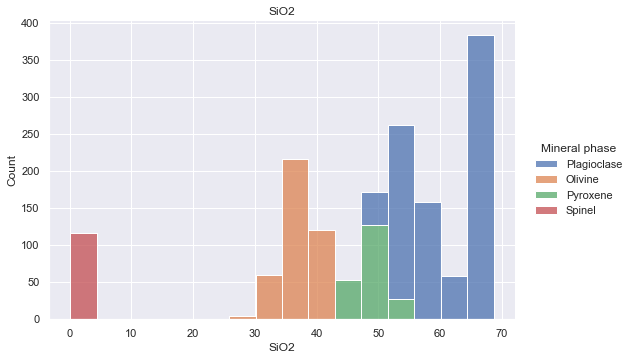

In [58]:
scatter = sns.displot(
    data=ndf,
    x='SiO2',
    kind="hist",
    aspect=1.5,
    hue='Mineral phase',
    multiple='stack',
).set(
    title="SiO2 weight % "
)

### This graph is looking at the difference in percent weight of SiO2 based on the mineral phase.

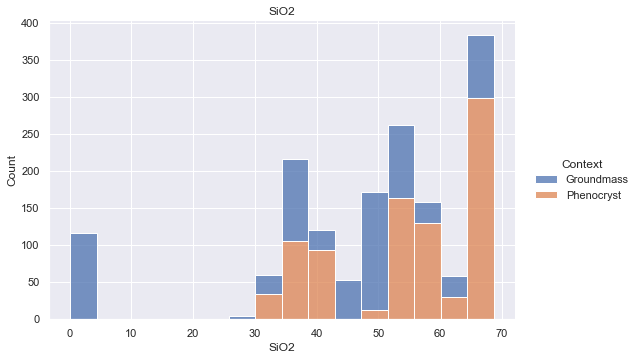

In [59]:
scatter = sns.displot(
    data=ndf,
    x='SiO2',
    kind="hist",
    aspect=1.5,
    hue='Context',
    multiple='stack',
).set(
    title="SiO2 weight % "
)

### This graph is looking at the difference in percent weight of SiO2 based on the context of the mineral.

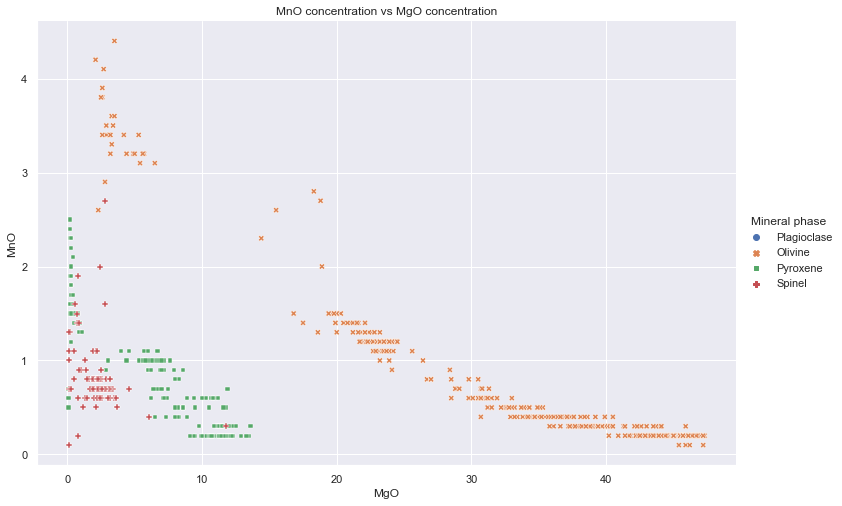

In [72]:
scatter = sns.relplot(
    data=df, 
    x="MgO", 
    y="MnO", 
    kind="scatter",
    height=7,
    aspect=1.5, 
    hue="Mineral phase",
    style="Mineral phase",
).set(
    title="MnO weight % vs MgO weight % "
)

### This graph is looking at the different amounts of MnO and MgO weight percentages based on the Mineral Phase of Olivine, Pyroxene and Spinel specifically.

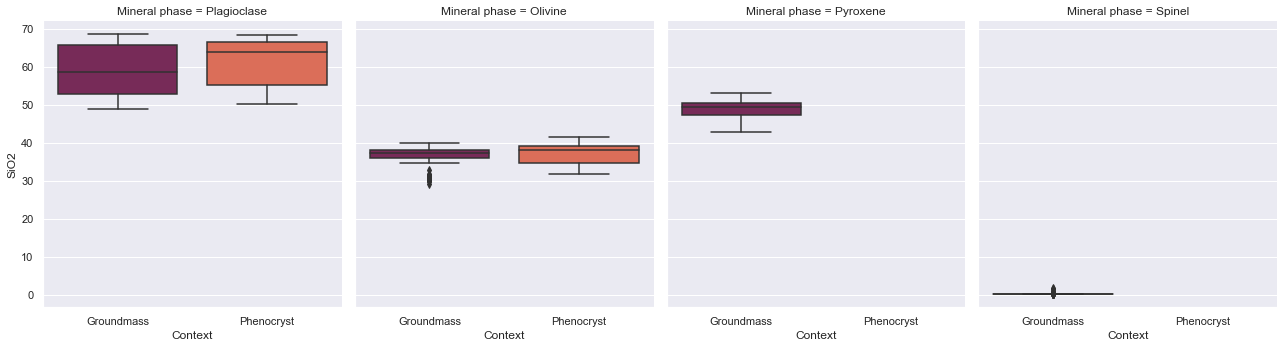

In [67]:
box = sns.catplot(
    data=df,
    kind="box",
    x='Context',
    y='SiO2',
    col="Mineral phase",
    aspect=0.9,
    palette='rocket',
)

### This graph is looking at the difference in percent weight of SiO2 based on the mineral phase as well as context.

C:\Users\conno\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\conno\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


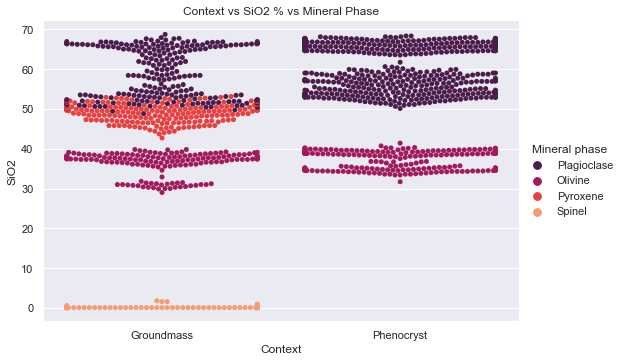

In [73]:
swarm = sns.catplot(
    data=df,
    kind="swarm",
    x='Context',
    y='SiO2',
    aspect=1.5,
    hue='Mineral phase',
    palette='rocket',
).set(
    title="Context vs SiO2 % vs Mineral Phase"
)

### This graph is looking at the difference in percent weight of SiO2 based on the mineral phase as well as context in a different view.

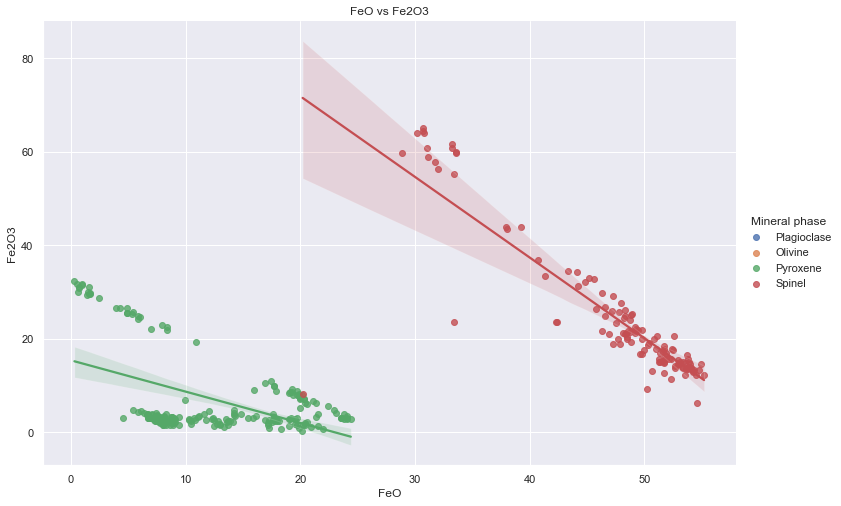

In [63]:
scatter = sns.lmplot(
    data=df,
    x='FeO',
    y='Fe2O3',
    height=7,
    aspect=1.5,
    hue="Mineral phase",
).set(
    title="FeO vs Fe2O3",
)

### This graph is looking at the difference in percent weight of Fe2O3 and FeO in mineral phases Pyroxene and Spinel.

#### What else can we learn from the different combinations of scatter plots? Pair plots can show us a full view.

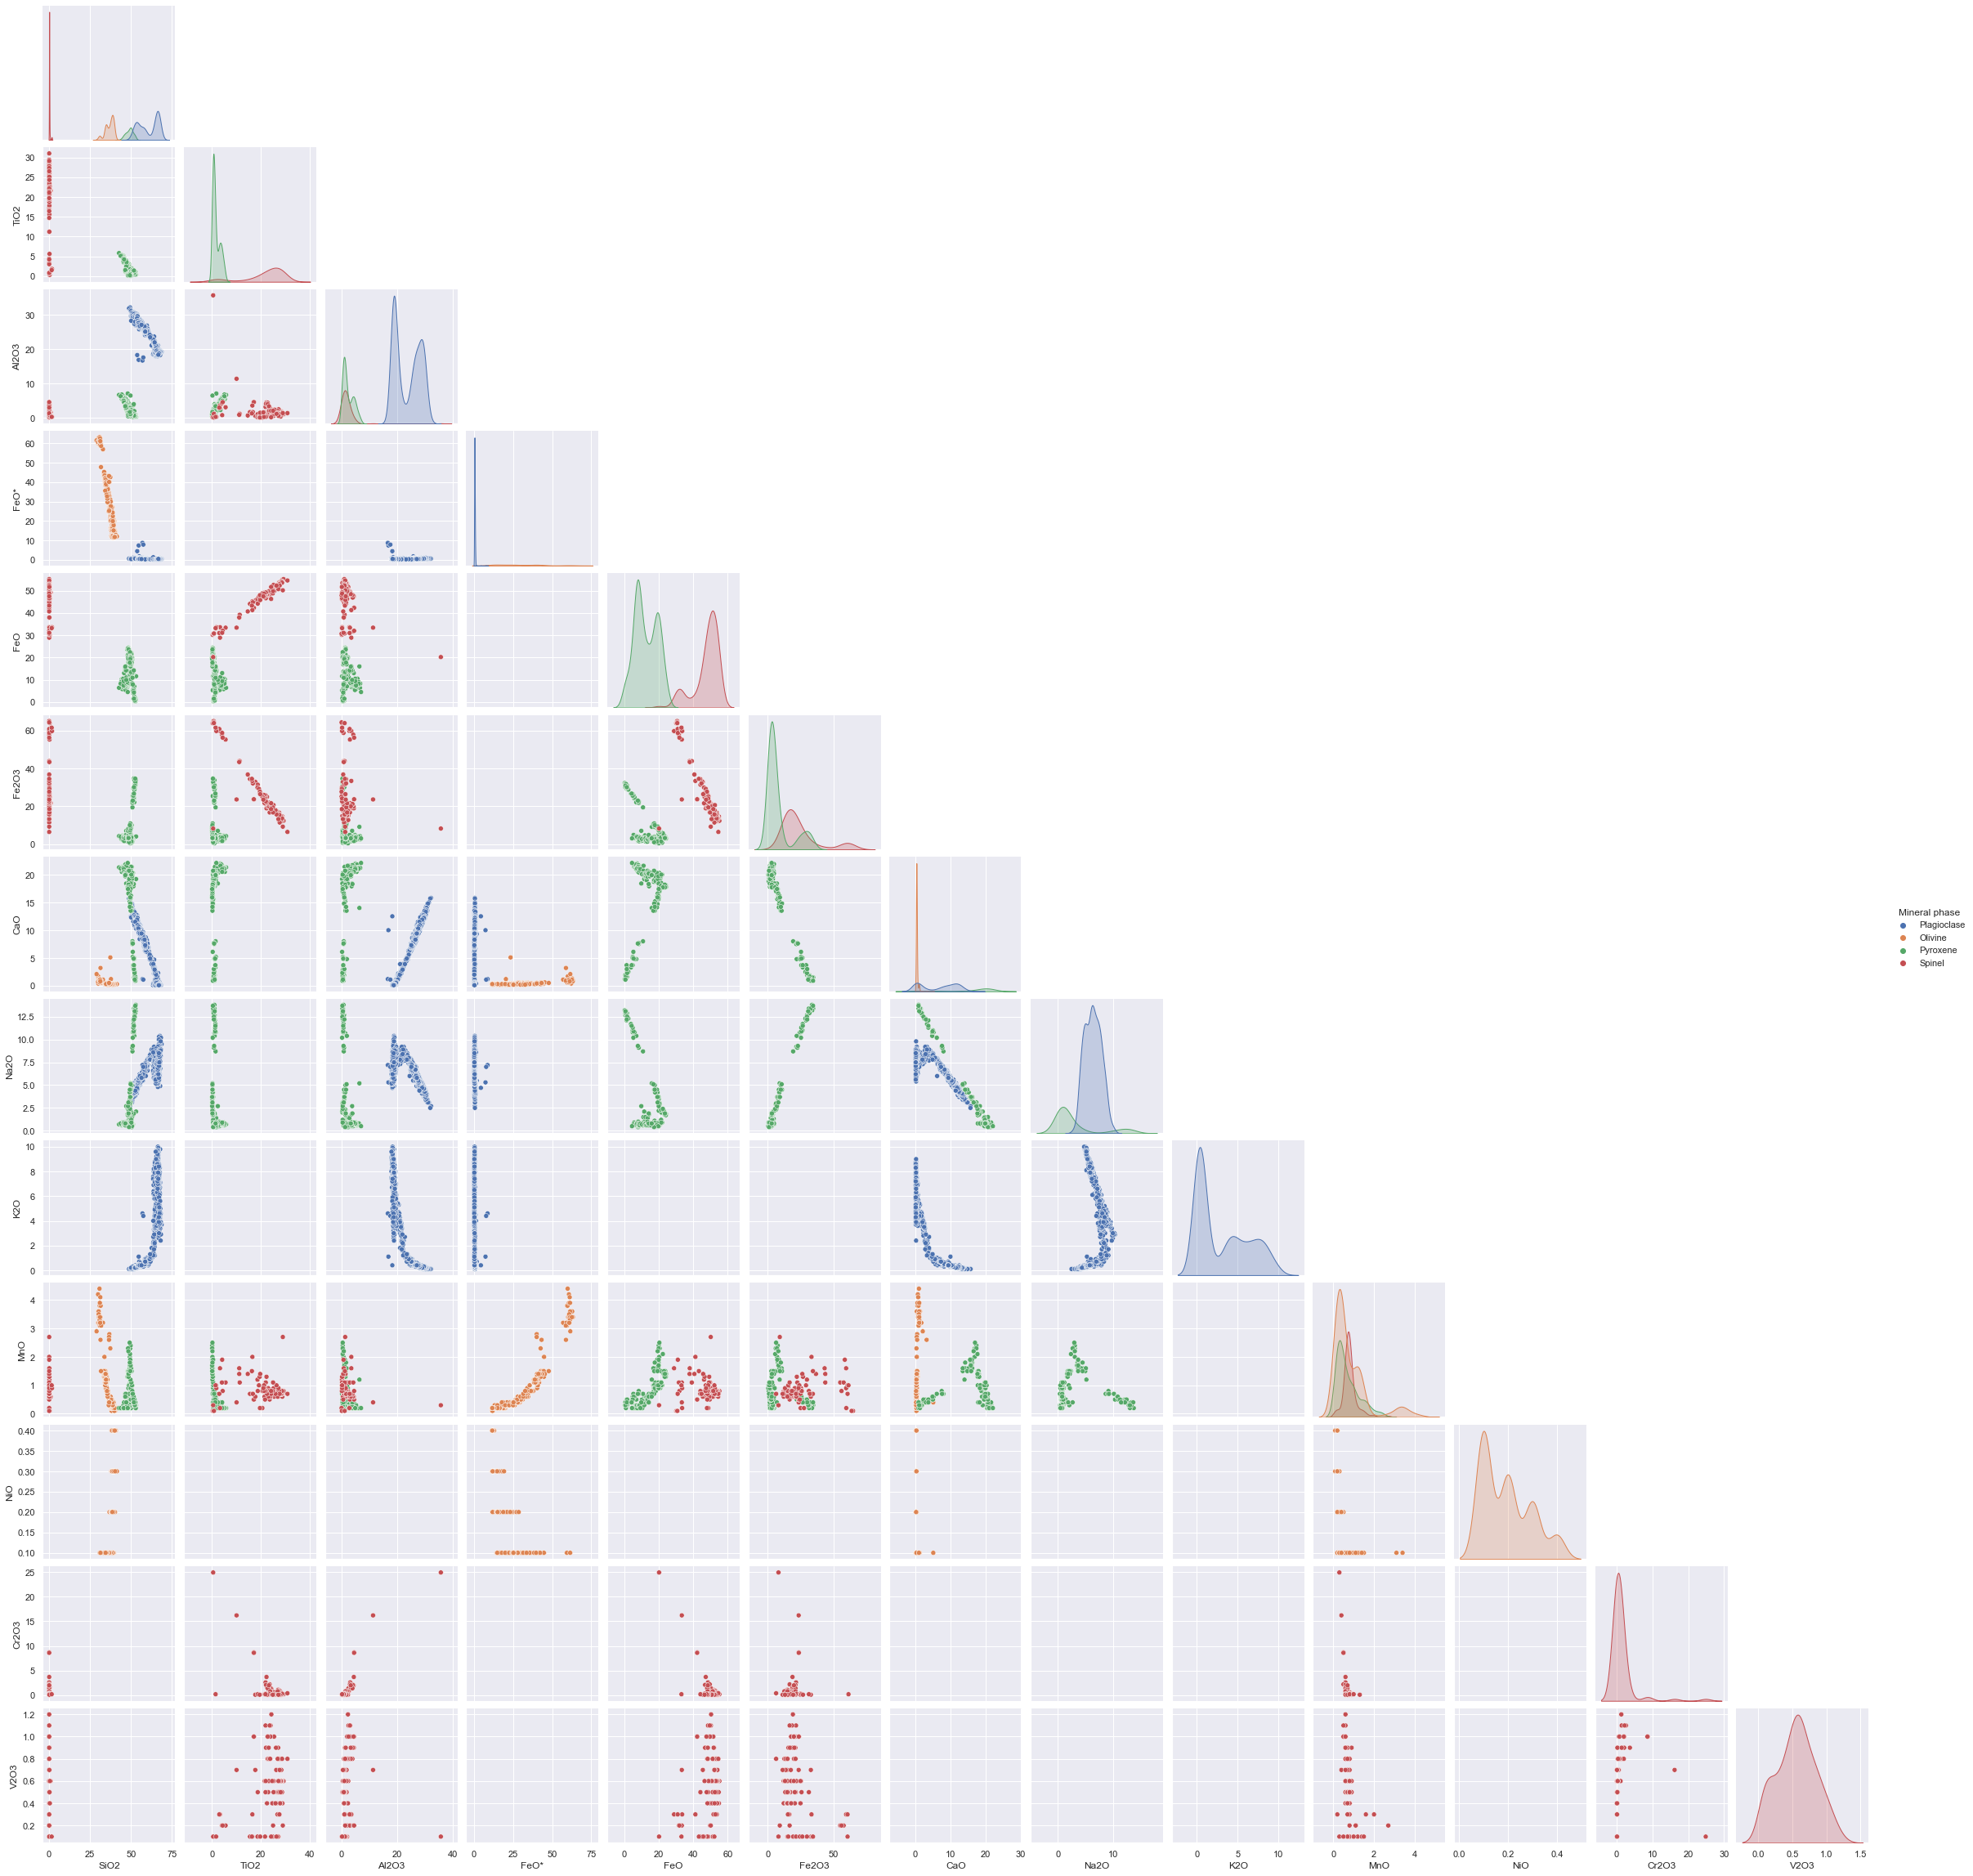

In [70]:
_ = sns.pairplot(
    data=df[['SiO2', 'TiO2', 'Al2O3', 'FeO*', 'FeO', 'Fe2O3', 'CaO', 'Na2O', 'K2O', 'MnO', 'NiO', 'Cr2O3', 'V2O3', 'Mineral phase']],
    hue="Mineral phase",
    corner=True
)

## From looking at this we can see that each mineral phase consist of varying different types of oxide compounds and this allows for a nice way to see the similarities and differences each compound has

# Summary

## SiO2
One of the biggest findings is that you are able to find what mineral phase you have mostly just off of the SiO2 weight contribution. Looking at the swarm graph, you can see some very clear distinctions between each mineral phase based on their percent SiO2. 
 
Sadly, the other compounds aren't as helpful for big comparison across the whole group because all of the phases don't use every element. We can use the pair plot above to see lots of neat little trends that could be used with each element but SiO2 is by far the most useful.

## Mineral Phases
So our four mineral phases are Plagioclase, Olivine, Pyroxene, and Spinel. Plagioclase rocks typically have SiO2 percent of 51% or higher, Pyroxene has a range of ~52%-44%, Olivine has a range of 44-38% and Spinel has 0.1% or less. We also find that the mineral phases Pyroxene and Spinel do not appear in the context of Phenocryst.

## Context
Our two contexts are groundmass and phenocryst. Groundmasses are smaller crystals than a phenocryst. Groundmasses also contained all 4 mineral phases where as phenocryst did not. Phenocryst on average did have a higher SiO2 content most likely due to no having Spinel crystals which bring down the groundmass average significantly.

## Overall
It was really interesting to go through this data. It was fun for us to work with all the different numbers and find insights in something that we really didn't know anything about. We enjoyed being able to maniuplate the data set and really make it feel like ours after cleaning it up a lot. Overall, this data showed us an interesting insight into the composition of different volcanic crystals. This lab also really helped us hone our skills and get much more used to creating visualizations and looking through data